# Melhoramento de imagem

1. Transformação de Pixel
2. Imagem Inversa
3. Transformação da Lei de Potência
4. Transformação Logaritmica 
5. Equalização do histograma
6. Equalização de Histograma Adaptativo Limitada por Contraste
7. Alongamento de contraste
8. Correção sigmoidal
9. Normalização de contraste local




In [1]:
import cv2 as cv
print("OpenCV: ", cv.__version__)
import numpy as np
print("numpy: ", np.__version__)
import matplotlib.pyplot as plt
plt.style.use('classic')
#%matplotlib
#%matplotlib notebook
#%matplotlib inline
%matplotlib widget
from skimage.exposure import equalize_adapthist
from skimage.exposure import adjust_sigmoid

OpenCV:  4.7.0
numpy:  1.24.2


(1086, 663, 3)


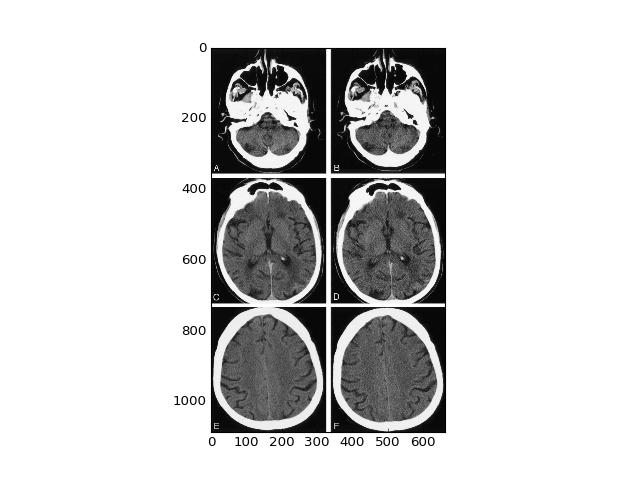

In [2]:
img = cv.imread('Imagens/image1.png')
print(img.shape)
fig = plt.figure()
ax = plt.axes()
ax.imshow(img, 'gray')

In [3]:
# Converting the image to grayscale.
imgG = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

Até aqui discutimos filtros de imagem. O filtro melhora a qualidade de uma imagem para que detalhes importantes possam ser visualizados e quantificados. Discutiremos agora mais algumas técnicas de aprimoramento de imagem. Essas técnicas transformam os valores de pixel na imagem de entrada em um novo valor na imagem de saída usando uma função de mapeamento. Discutimos transformação logarítmica, transformação de lei de potência, inversão de imagem, equalização de histograma e alongamento de contraste. 

Uma transformação é uma função que mapeia um conjunto de entradas para um conjunto de saídas de modo que cada entrada tenha exatamente uma saída. No caso de imagens, uma transformação toma como entrada as intensidades de pixel da imagem e cria uma nova imagem onde as intensidades de pixel correspondentes são definidas pela transformação.

### Imagem Inversa

A transformação inversa da imagem é uma transformação linear que tem como objetivo transformar as intensidades escuras na imagem de entrada em intensidades claras na imagem de saída e vice-versa. 

(-0.5, 662.5, 1085.5, -0.5)

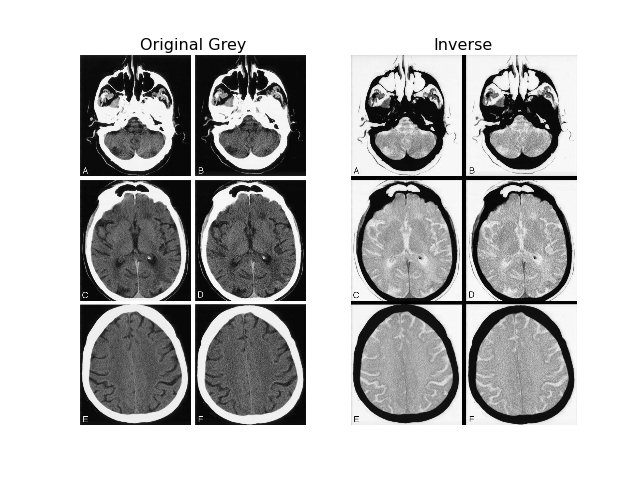

In [4]:
#Imagem Inversa
# Performing the inversion operation
imgInv = 255 - imgG
fig, ax = plt.subplots(1,2)
ax[0].imshow(imgG, cmap='gray')
ax[0].set_title('Original Grey')
ax[0].axis('off')
ax[1].imshow(imgInv, cmap='gray')
ax[1].set_title('Inverse')
ax[1].axis('off')

### Transformação da lei de potência

A transformação da lei de potência, também conhecida como correção gama, é usada para melhorar a qualidade da imagem. A transformação de potência em $(i, j)$ é dada por

$$ t(i, j) = kI(i, j)^\gamma $$

Se $\gamma = 1$, então o mapeamento é linear e a imagem de saída é igual à imagem de entrada. Quando $\gamma < 1$, uma faixa estreita de valores de pixels escuros ou de baixa intensidade na imagem de entrada é mapeada para uma ampla faixa de intensidades na imagem de saída, enquanto uma ampla faixa de valores de pixels claros ou de alta intensidade na imagem de entrada é mapeada mapeado para uma faixa estreita de altas intensidades na imagem de saída. O efeito dos valores de $\gamma >1$ é oposto.

(-0.5, 662.5, 1085.5, -0.5)

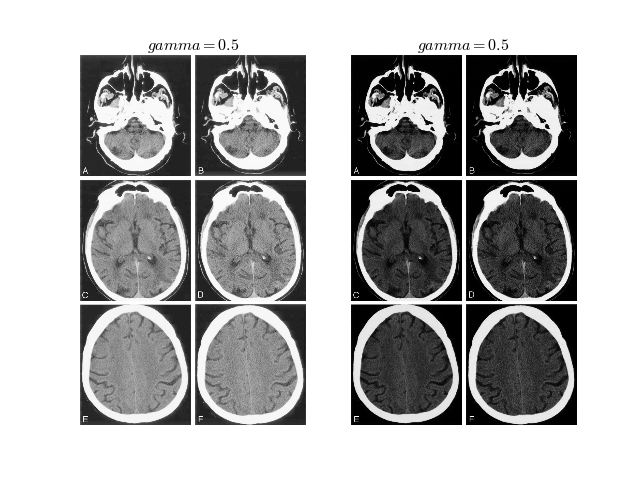

In [5]:
#Transformação da Lei de Potência

def gammaCorr(img, gamma = 0.5):
    # img is converted to type float.
    gammaImg = img.astype(float) + 1.0
    # Maximum value is determined.
    imgMax = np.max(gammaImg)
    # img is normalized
    gammaImg = gammaImg/imgMax
    # gamma-correction exponent is computed.
    gammaImg = np.log(gammaImg)*gamma
    # gamma-correction is performed.
    gammaImg = np.exp(gammaImg)*256.0 - 1.0
    # img is converted to type int.
    gammaImg = gammaImg.astype(np.uint8)
    return gammaImg

imgGamm05 = gammaCorr(imgG, 0.5) 
imgGamm15 = gammaCorr(imgG, 1.5)
fig, ax = plt.subplots(1,2)
ax[0].imshow(imgGamm05, cmap='gray')
ax[0].set_title('$gamma = 0.5$')
ax[0].axis('off')
ax[1].imshow(imgGamm15, cmap='gray')
ax[1].set_title('$gamma = 0.5$')
ax[1].axis('off')

### Transformação Logarítmica

A transformação logaritmica é usada para aprimorar as intensidades de pixel que, de outra forma, seriam perdidas devido a uma ampla gama de valores de intensidade ou perdidas em detrimento de valores de alta intensidade. Se as intensidades na imagem variam de $[0, L − 1]$ então a transformação logarítmica em $(i, j)$ é dada por

$$ t(i, j) = k \log (1 + I(i, j)) $$

De forma semelhante à transformação da lei de potência, com $\gamma < 1$, a transformação logarítmica também mapeia uma pequena faixa de valores de pixels escuros ou de baixa intensidade na imagem de entrada para uma ampla faixa de intensidades na imagem de saída, enquanto uma ampla faixa de valores de pixel brilhantes ou de alta intensidade na imagem de entrada são mapeados para uma faixa estreita de altas intensidades na imagem de saída.

(-0.5, 662.5, 1085.5, -0.5)

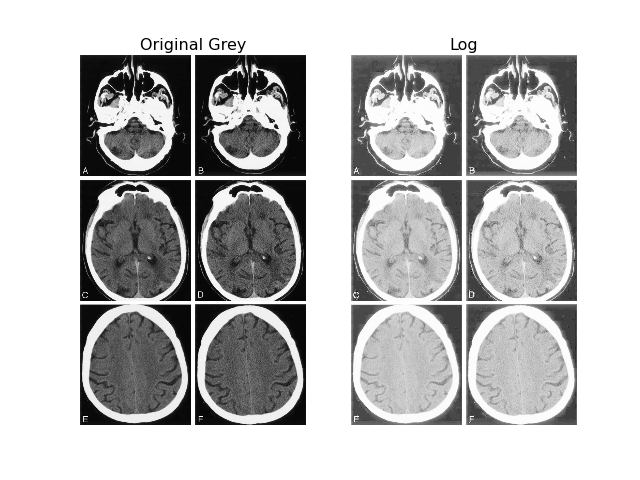

In [6]:
#Transformação Logaritmica 
def logCorr(img):
    # img is converted to type float.
    logImg = img.astype(float) + 1.0
    # Maximum value is determined.
    imgMax = np.max(logImg)
    # log transformation is computed.
    logImg = np.log(logImg)/np.log(imgMax)
    # log transformation is performed.
    logImg = logImg*256.0 - 1.0
    # img is converted to type int.
    logImg = logImg.astype(np.uint8)
    return logImg

imgLog = logCorr(imgG) 

fig, ax = plt.subplots(1,2)
ax[0].imshow(imgG, cmap='gray')
ax[0].set_title('Original Grey')
ax[0].axis('off')
ax[1].imshow(imgLog, cmap='gray')
ax[1].set_title('Log')
ax[1].axis('off')

### Equalização do histograma

O histograma de uma imagem é uma função discreta, sua entrada é o valor do nível de cinza e a saída é o número de pixels com esse valor do nível de cinza e pode ser dado como $h(xn) = yn$. Em uma imagem em tons de cinza, as intensidades da imagem assumem valores entre $[0, L − 1]$. Conforme discutido anteriormente, valores baixos de nível de cinza na imagem (o lado esquerdo do histograma) correspondem a regiões escuras e valores altos de nível de cinza na imagem (o lado direito do histograma) correspondem a regiões claras.

Em uma imagem de baixo contraste, o histograma é estreito, enquanto em uma imagem com melhor contraste, o histograma é espalhado. Na equalização do histograma, o objetivo é melhorar o contraste de uma imagem redimensionando o mesmo para que o histograma da nova imagem seja espalhado e as intensidades de pixel variem em todos os valores possíveis de nível de cinza. O redimensionamento do histograma será realizado usando uma transformação. Para garantir que para cada valor de nível de cinza na imagem de entrada haja uma saída correspondente, é necessária uma transformação de um para um; ou seja, cada entrada tem uma única saída. Isso significa que a transformação deve ser uma função monotônica. Isso garantirá que a transformação seja invertível.

Antes que a transformação de equalização do histograma seja definida:

* O histograma da imagem de entrada é normalizado de modo que a faixa do histograma normalizado esteja em $[0, 1]$.

* Como a imagem é discreta, a probabilidade de um valor de nível de cinza, denotada por $p_x(i)$, é a razão entre o número de pixels com um valor de cinza $i$ e o número total de pixels na imagem. Isso geralmente é chamado de função de distribuição de probabilidade (PDF).

* A função de distribuição cumulativa (CDF) é definida como $C(i) = \sum_{j=0}^i p_x(j), onde $0 \leq i $leq L−1$ e onde $L$ é o número total de valores de nível de cinza na imagem. A $C(i)$ é a soma de todos as probabilidades dos valores de nível de cinza do pixel de $0$ a $i$. Note que $C$ é uma função crescente.

A transformação de equalização do histograma pode ser definida da seguinte forma:

$$h(u) = \text{round} \left( \frac{C(u)-C_{min}}{1 - C_{min}} * (L-1) \right) $$

In [ ]:
help(cv.equalizeHist)

In [ ]:
help(np.histogram)

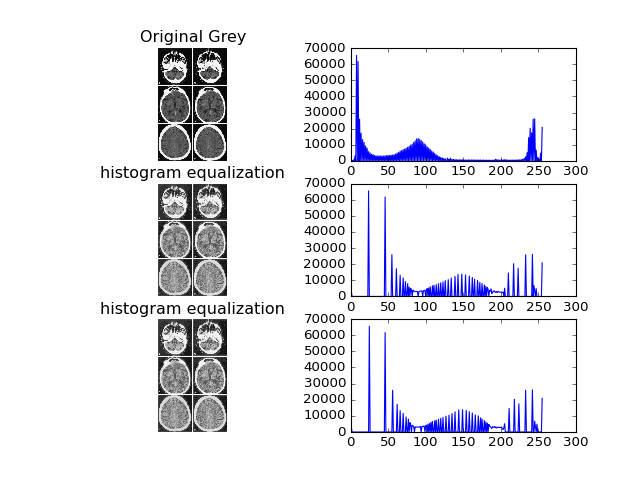

In [7]:
#Equalização do histograma

# 2D array is converted to a 1D array.
fl = imgG.flatten()
# Histogram and the bins of the image are computed.
hist,bins = np.histogram(imgG,256,[0,255])
# cumulative distribution function is computed
cdf = hist.cumsum()
# Places where cdf=0 is masked or ignored and
# rest is stored in cdf_m.
cdf_m = np.ma.masked_equal(cdf,0)
# Histogram equalization is performed.
num_cdf_m = (cdf_m - cdf_m.min())*255
den_cdf_m = (cdf_m.max()-cdf_m.min())
cdf_m = num_cdf_m/den_cdf_m
# The masked places in cdf_m are now 0.
cdf = np.ma.filled(cdf_m,0).astype('uint8')
# cdf values are assigned in the flattened array.
imgHistEq = cdf[fl]
# im2 is 1D so we use reshape command to.
#  make it into 2D.
imgHistEq = np.reshape(imgHistEq,imgG.shape)

#or

imgHistEq2 = cv.equalizeHist(imgG)

fig, ax = plt.subplots(3,2)
ax[0,0].imshow(imgG, cmap='gray', vmin=0, vmax=255)
ax[0,0].set_title('Original Grey')
ax[0,0].axis('off')
ax[0, 1].plot(hist)
ax[1,0].imshow(imgHistEq, cmap='gray', vmin=0, vmax=255)
ax[1,0].set_title('histogram equalization')
ax[1,0].axis('off')
hist2,bins = np.histogram(imgHistEq,256,[0,255])
ax[1,1].plot(hist2)
ax[2,0].imshow(imgHistEq2, cmap='gray', vmin=0, vmax=255)
ax[2,0].set_title('histogram equalization')
ax[2,0].axis('off')
hist3,bins = np.histogram(imgHistEq2,256,[0,255])
ax[2,1].plot(hist3)

(-0.5, 662.5, 1085.5, -0.5)

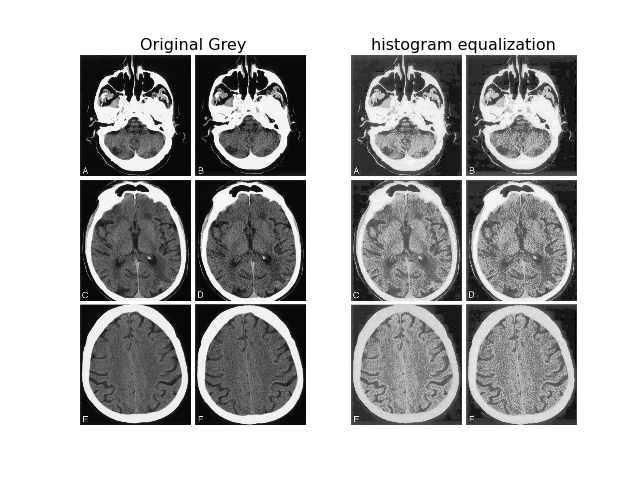

In [8]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(imgG, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Grey')
ax[0].axis('off')

ax[1].imshow(imgHistEq, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('histogram equalization')
ax[1].axis('off')


### CLAHE

No método de equalização de histograma acima, observe que a imagem de saída é muito brilhante. Em vez de usar o histograma de toda a imagem, o Contrast Limited Adaptive Histogram Equalization (CLAHE), a imagem é dividida em pequenas regiões e um histograma de cada região é calculado.

Um limite de contraste é escolhido como um limite para recortar o histograma em cada bin, e os pixels acima do limite não são ignorados, mas sim distribuídos para outros bins antes que a equalização do histograma seja aplicada.

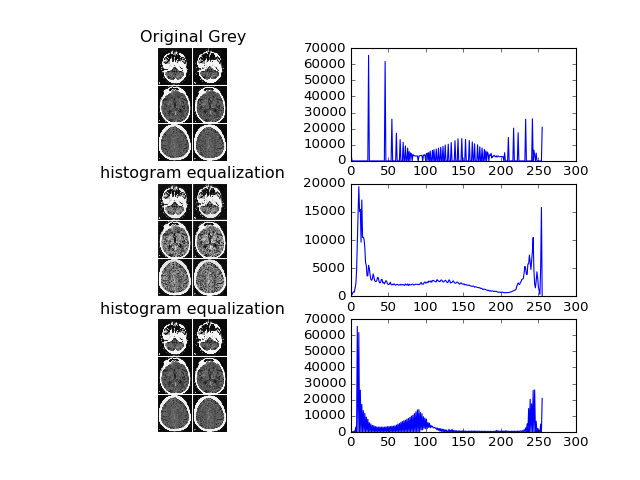

In [13]:
#Equalização de Histograma Adaptativo Limitada por Contraste
imgEqAdHis1 = equalize_adapthist(imgG, clip_limit = 0.02)
# Rescaling img2 from 0 to 255.
imgEqAdHis1 = (imgEqAdHis1*255.0).astype(np.uint8)

# create a CLAHE object (Arguments are optional).
clahe = cv.createCLAHE(clipLimit=0.02, tileGridSize=(8,8))
imgEqAdHis2 = clahe.apply(imgG)

fig, ax = plt.subplots(3,2)
ax[0,0].imshow(imgG, cmap='gray')
ax[0,0].set_title('Original Grey')
ax[0,0].axis('off')
hist1,bins = np.histogram(imgHistEq,256,[0,255])
ax[0, 1].plot(hist1)
ax[1,0].imshow(imgEqAdHis1, cmap='gray')
ax[1,0].set_title('histogram equalization')
ax[1,0].axis('off')
hist2,bins = np.histogram(imgEqAdHis1,256,[0,255])
ax[1,1].plot(hist2)
ax[2,0].imshow(imgEqAdHis2, cmap='gray')
ax[2,0].set_title('histogram equalization')
ax[2,0].axis('off')
hist3,bins = np.histogram(imgEqAdHis2,256,[0,255])
ax[2,1].plot(hist3)

(-0.5, 662.5, 1085.5, -0.5)

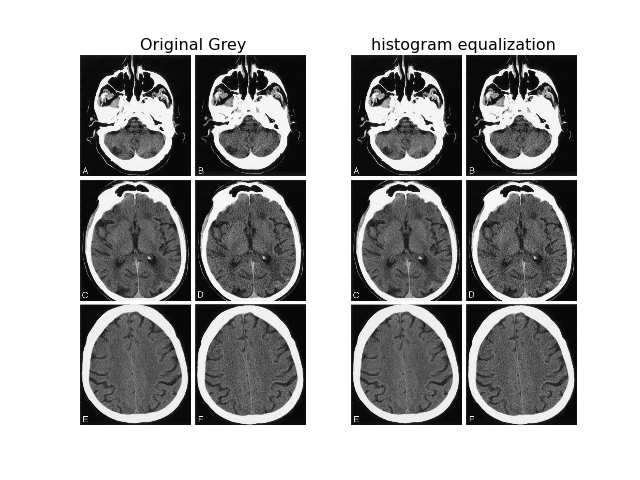

In [14]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(imgG, cmap='gray')
ax[0].set_title('Original Grey')
ax[0].axis('off')

ax[1].imshow(imgEqAdHis2, cmap='gray')
ax[1].set_title('histogram equalization')
ax[1].axis('off')

### Alongamento de contraste

O alongamento de contraste usa uma ideia à equalização de histograma, com a diferença de que as intensidades de pixel são redimensionadas usando os valores de pixel em vez de probabilidades e CDF. O alongamento de contraste é usado para aumentar a faixa de valores de pixel redimensionando os valores de pixel na imagem de entrada. Considere uma imagem de 8 bits com uma faixa de valor de pixel de $[a, b]$ onde $a > 0$ e $b < 255$. Se $a$ for significativamente maior que zero e se $b$ for significativamente menor que 255, então os detalhes na imagem podem não ser visíveis. Esse problema pode ser compensado redimensionando o intervalo de valores de pixel para [0,255], um intervalo de pixels muito maior.
A transformação de alongamento de contraste, t(i,j) é dada pela seguinte equação:

$$ t(i, j) = 255*\frac{I(i, j) - a}{b - a}$$

(-0.5, 662.5, 1085.5, -0.5)

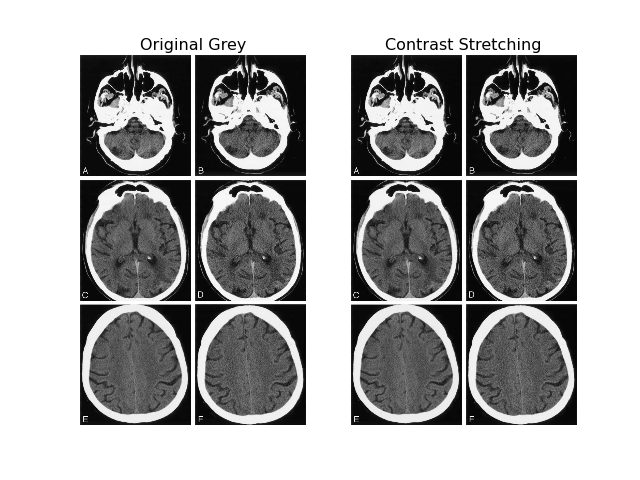

In [15]:
#Alongamento de contraste
# Finding the maximum and minimum pixel values
imgMax = imgG.max()
imgMin = imgG.min()
# Converting im1 to float.
imgCS = imgG.astype(float)
# Contrast stretching transformation.
imgCS = 255.0*(imgCS - imgMin)/(imgMax - imgMin + 0.0000001)
imgCS = imgCS.astype('uint8')

fig, ax = plt.subplots(1,2)
ax[0].imshow(imgG, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Grey')
ax[0].axis('off')
ax[1].imshow(imgCS, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Contrast Stretching')
ax[1].axis('off')

#  Correção sigmoidal

Uma função sigmóide é definida como

$$ S(x) = \frac{1}{1 + e^{-x*\text{gain}}} $$

Esta função atinge assintoticamente 0 para valores negativos baixos ou atinge 1 assintoticamente para valores positivos altos e está sempre limitada entre 0 e 1. Na definição típica de uma função sigmoide, o valor de ganho é 1. Porém, no caso da correção sigmoide, usaremos o ganho como um hiperparâmetro para ajuste fino do realce da imagem.

No scikit, a correção sigmóide é realizada usando a fórmula

$$ S(x) = \frac{1}{1 + e^{(\text{cutoff} - \text{pixelvalue})*\text{gain}}} $$ 

In [ ]:
help(adjust_sigmoid)

(-0.5, 662.5, 1085.5, -0.5)

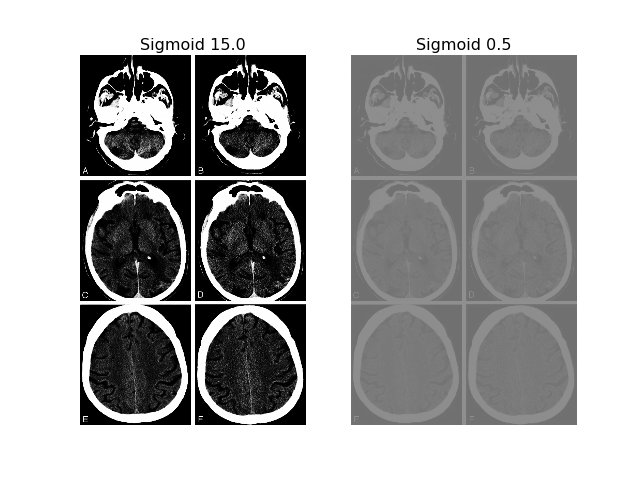

In [16]:
#Correção sigmoidal
imgSig15 = adjust_sigmoid(imgG, gain=15)
imgSig05 = adjust_sigmoid(imgG, gain=.5)

fig, ax = plt.subplots(1,2)
ax[0].imshow(imgSig15, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Sigmoid 15.0')
ax[0].axis('off')
ax[1].imshow(imgSig05, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Sigmoid 0.5')
ax[1].axis('off')

In [ ]:
#Normalização de contraste local